### Features Analysis

In [2]:
# ===============================================
# Feature Analysis and Importance Section (Two Targets)
# ===============================================
# Purpose:
# - Analyze feature importance for both 'death' and 'hospdead' targets.
# - Use visualizations to identify key features for each target.
# - Compare and contrast the feature importance rankings for the two targets.

# Step 1: Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the cleaned dataset from parquet file
# Rationale: Contains preprocessed features ready for feature analysis.
df_clean = pd.read_parquet('../../data/cleaned_output.parquet')

In [3]:

# Step 3: Separate features and targets
# Rationale: Prepare predictor variables (X) and each target variable (y1, y2) separately.
X = df_clean.drop(columns=['death', 'hospdead'])
y_death = df_clean['death']
y_hospdead = df_clean['hospdead']


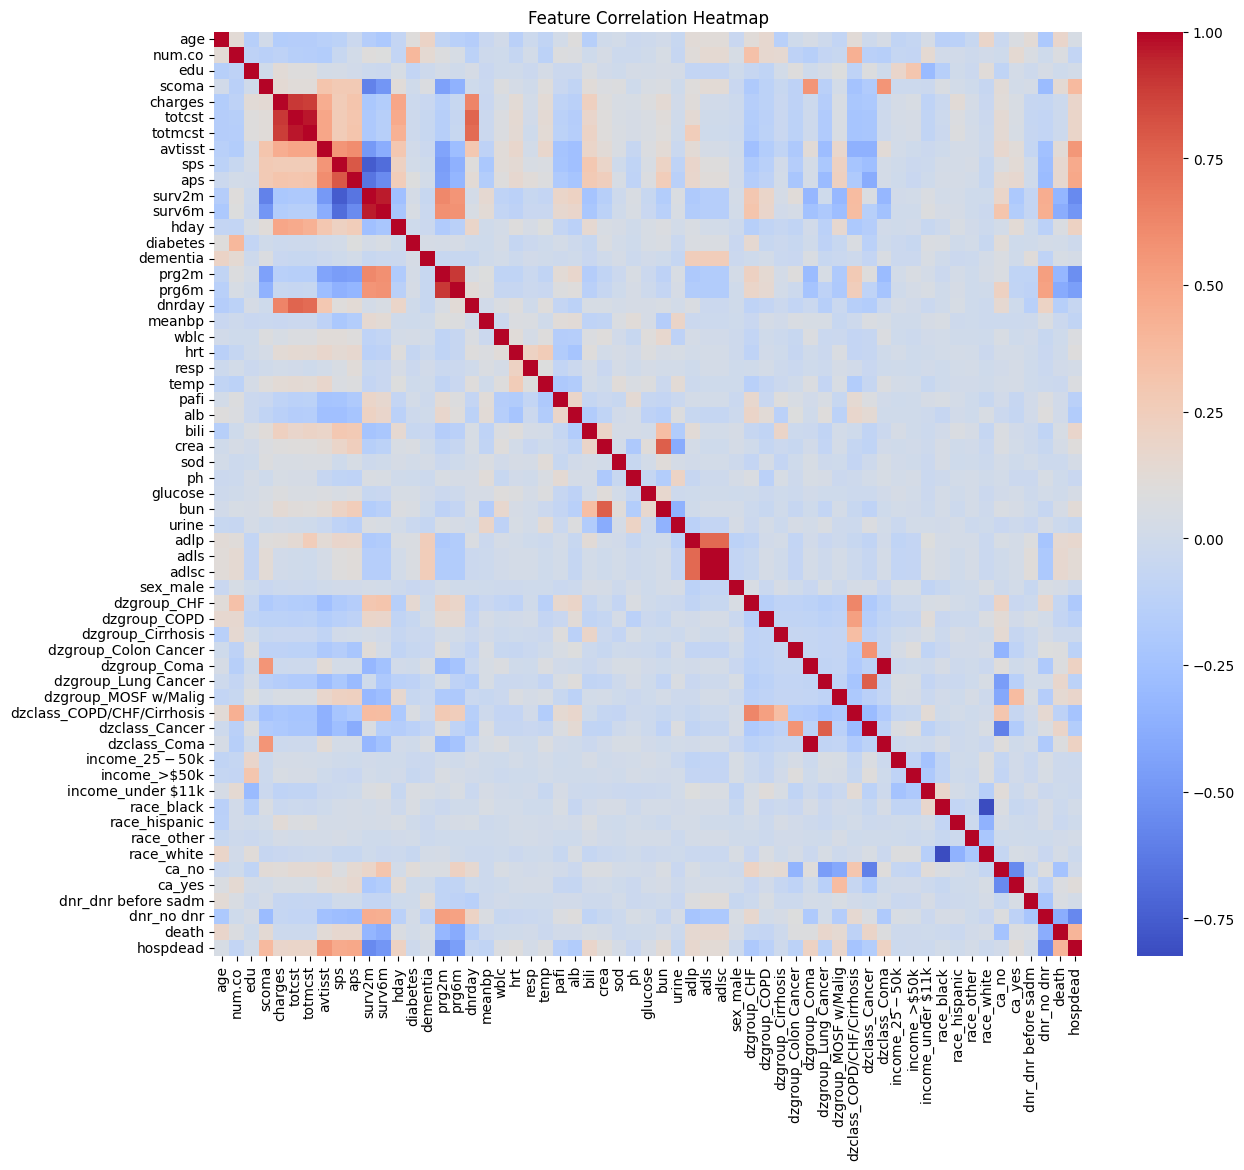

In [4]:
# Step 4: Visualize feature correlations with a heatmap
# Rationale: Visualizes relationships between features and both targets.
plt.figure(figsize=(14, 12))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

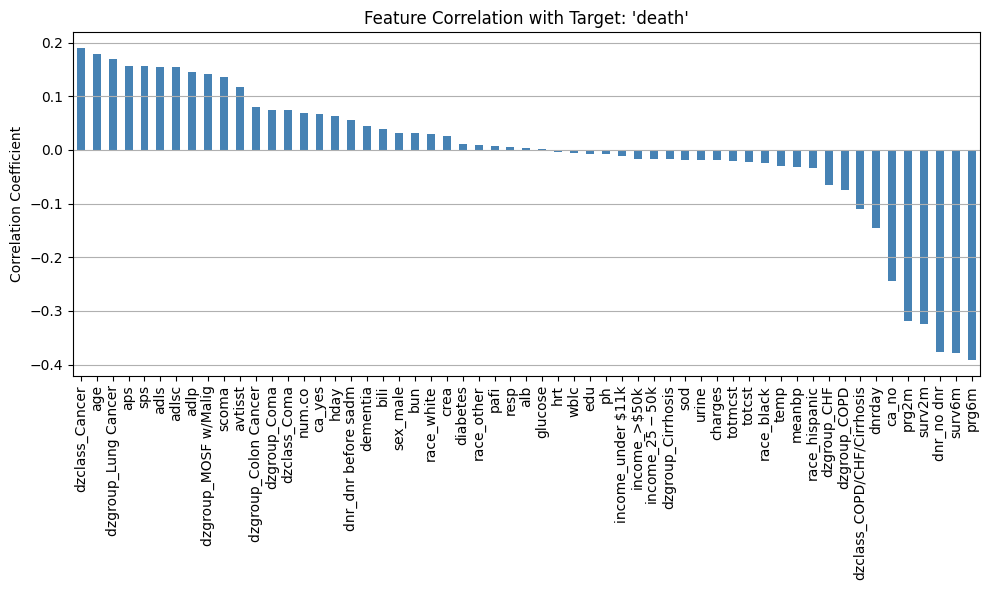

In [5]:
# Step 5: Plot feature correlation with 'death' as a bar chart
# Rationale: Highlights features most correlated with the 'death' target.
target_corr_death = correlation_matrix['death'].drop(['death', 'hospdead']).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
target_corr_death.plot(kind='bar', color='steelblue')
plt.title("Feature Correlation with Target: 'death'")
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

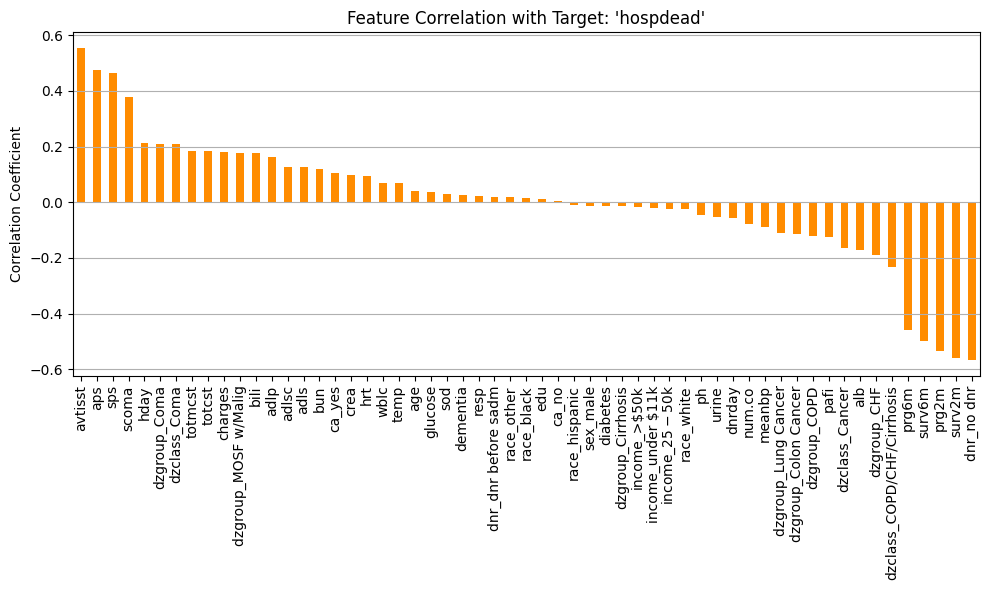

In [6]:
# Step 6: Plot feature correlation with 'hospdead' as a bar chart
# Rationale: Highlights features most correlated with the 'hospdead' target.
target_corr_hospdead = correlation_matrix['hospdead'].drop(['death', 'hospdead']).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
target_corr_hospdead.plot(kind='bar', color='darkorange')
plt.title("Feature Correlation with Target: 'hospdead'")
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

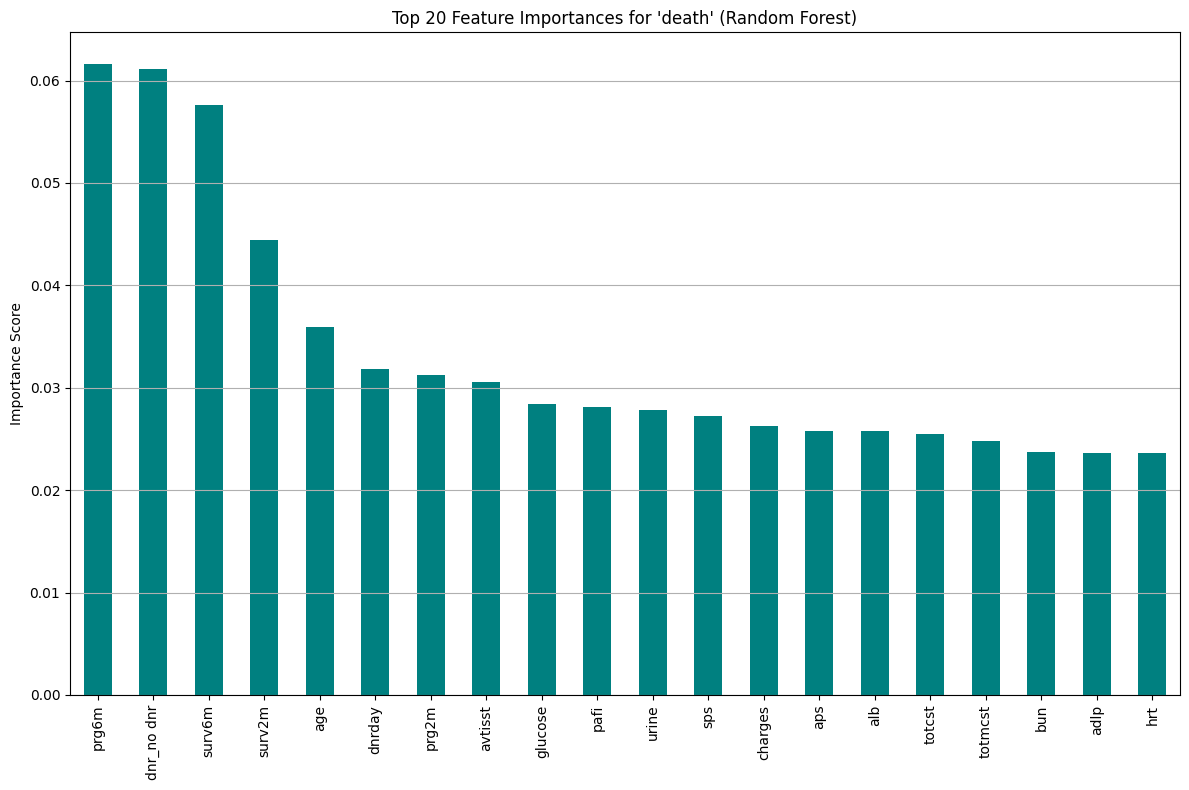

In [7]:
# Step 7: Train RandomForestClassifier to estimate feature importance for 'death'
# Rationale: Captures non-linear relationships and interactions for 'death' target.
from sklearn.ensemble import RandomForestClassifier

rf_model_death = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_death.fit(X, y_death)
feature_importances_death = pd.Series(rf_model_death.feature_importances_, index=X.columns)
feature_importances_death_sorted = feature_importances_death.sort_values(ascending=False)

# Step 8: Visualize feature importance for 'death'
plt.figure(figsize=(12, 8))
feature_importances_death_sorted.head(20).plot(kind='bar', color='teal')
plt.title("Top 20 Feature Importances for 'death' (Random Forest)")
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

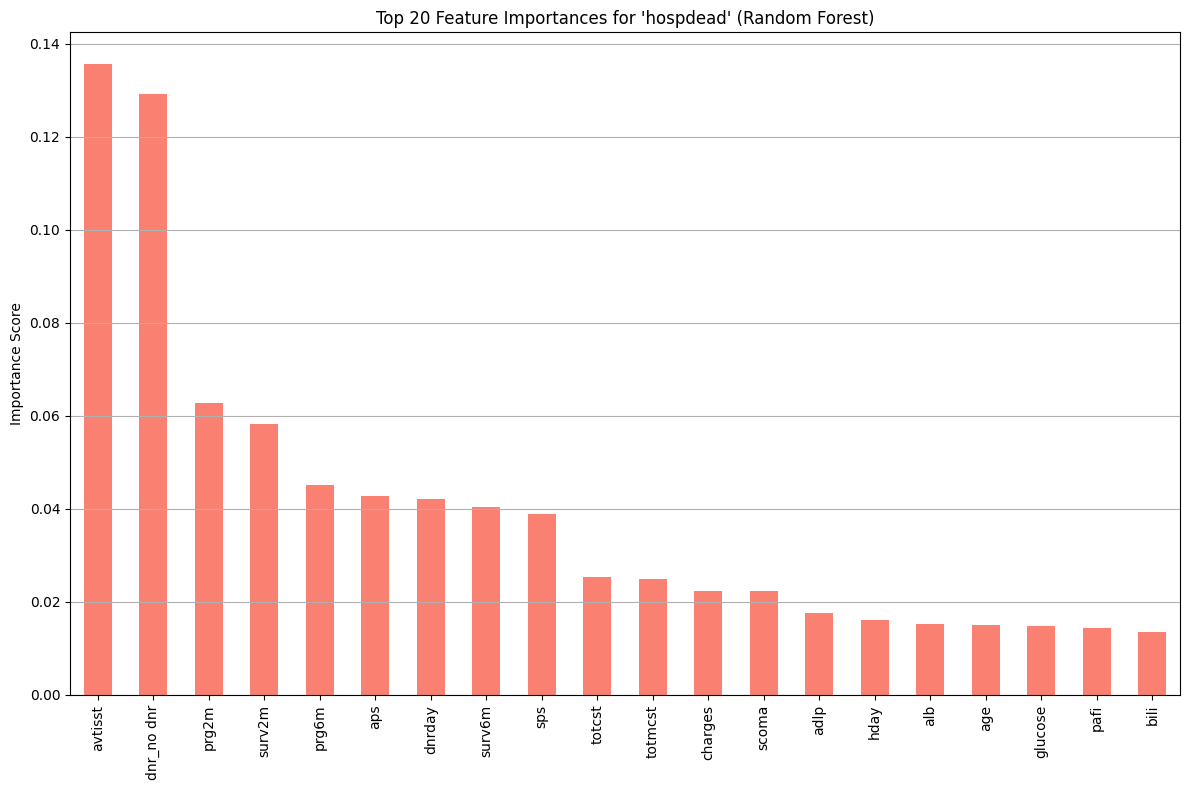

In [8]:
# Step 9: Train RandomForestClassifier to estimate feature importance for 'hospdead'
# Rationale: Captures non-linear relationships and interactions for 'hospdead' target.
rf_model_hospdead = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_hospdead.fit(X, y_hospdead)
feature_importances_hospdead = pd.Series(rf_model_hospdead.feature_importances_, index=X.columns)
feature_importances_hospdead_sorted = feature_importances_hospdead.sort_values(ascending=False)

# Step 10: Visualize feature importance for 'hospdead'
plt.figure(figsize=(12, 8))
feature_importances_hospdead_sorted.head(20).plot(kind='bar', color='salmon')
plt.title("Top 20 Feature Importances for 'hospdead' (Random Forest)")
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [9]:
# Step 11: Summary
# Rationale: Provides the ranked features for both targets side-by-side to help guide feature selection.
print("Top 20 Features Ranked by Random Forest Importance for 'death':")
print(feature_importances_death_sorted.head(20))
print("\nTop 20 Features Ranked by Random Forest Importance for 'hospdead':")
print(feature_importances_hospdead_sorted.head(20))

Top 20 Features Ranked by Random Forest Importance for 'death':
prg6m         0.061629
dnr_no dnr    0.061101
surv6m        0.057574
surv2m        0.044417
age           0.035918
dnrday        0.031857
prg2m         0.031207
avtisst       0.030591
glucose       0.028403
pafi          0.028116
urine         0.027787
sps           0.027240
charges       0.026290
aps           0.025746
alb           0.025746
totcst        0.025501
totmcst       0.024754
bun           0.023750
adlp          0.023670
hrt           0.023664
dtype: float64

Top 20 Features Ranked by Random Forest Importance for 'hospdead':
avtisst       0.135632
dnr_no dnr    0.129166
prg2m         0.062828
surv2m        0.058250
prg6m         0.045099
aps           0.042738
dnrday        0.042114
surv6m        0.040321
sps           0.038783
totcst        0.025254
totmcst       0.025010
charges       0.022406
scoma         0.022400
adlp          0.017563
hday          0.016041
alb           0.015182
age           0.015103
gl

Based on previous results, hospdead is mainly impacted by two variables, with low feature importance. this might indicate features imbalance. 
lets investigate that in the next steps.

Class Distribution for 'death':
1    6201
0    2904
Name: death, dtype: int64


/var/folders/7c/q5v9b4v91b3_6gdqgy5chh180000gn/T/ipykernel_19297/1692937510.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=death_counts.index, y=death_counts.values, palette='Blues_d')


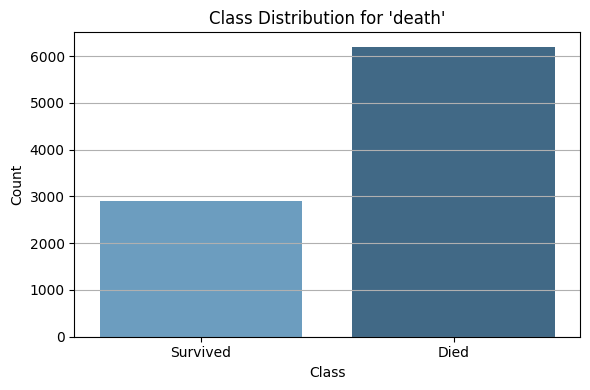

Class Distribution for 'hospdead':
0    6745
1    2360
Name: hospdead, dtype: int64


/var/folders/7c/q5v9b4v91b3_6gdqgy5chh180000gn/T/ipykernel_19297/1692937510.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hospdead_counts.index, y=hospdead_counts.values, palette='Oranges_d')


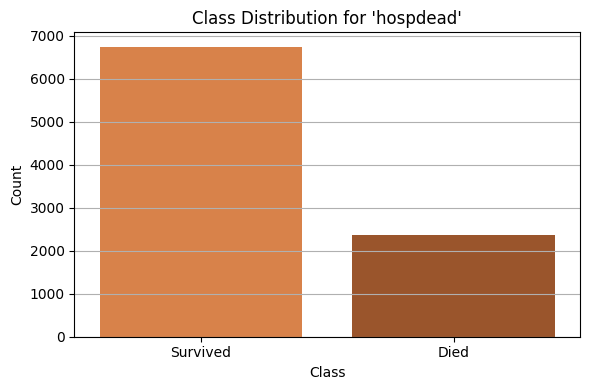

In [10]:
# ===============================================
# Target Class Balance Analysis
# ===============================================
# Purpose:
# - Check the class distribution of both 'death' and 'hospdead'.
# - Visualize the balance of these target variables using bar charts.
# - Rationale: Class imbalance can affect model performance and might require balancing techniques later.

# Step 1: Import essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the cleaned dataset from parquet file
# Rationale: Contains both targets ('death' and 'hospdead') and preprocessed features.
df_clean = pd.read_parquet('../../data/cleaned_output.parquet')

# Step 3: Check the class distribution for 'death'
# Rationale: Helps identify if the target variable is balanced or imbalanced.
death_counts = df_clean['death'].value_counts()
print("Class Distribution for 'death':")
print(death_counts)

# Step 4: Visualize the class distribution for 'death'
# Rationale: Bar plot makes it easier to visually interpret any imbalance.
plt.figure(figsize=(6, 4))
sns.barplot(x=death_counts.index, y=death_counts.values, palette='Blues_d')
plt.title("Class Distribution for 'death'")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Survived', 'Died'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 5: Check the class distribution for 'hospdead'
# Rationale: Helps identify if the target variable is balanced or imbalanced.
hospdead_counts = df_clean['hospdead'].value_counts()
print("Class Distribution for 'hospdead':")
print(hospdead_counts)

# Step 6: Visualize the class distribution for 'hospdead'
# Rationale: Bar plot makes it easier to visually interpret any imbalance.
plt.figure(figsize=(6, 4))
sns.barplot(x=hospdead_counts.index, y=hospdead_counts.values, palette='Oranges_d')
plt.title("Class Distribution for 'hospdead'")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ['Survived', 'Died'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Due to class imbalance we will implement the following steps:
- Add Class Weights to RandomForest - We’ll re-run RandomForestClassifier for both targets with class_weight='balanced' to correct for class imbalance
- Visualize Top Features by Class (Boxplots) - to visualize how the top 5 features (based on weighted RandomForest importance) distribute across classes.
- Implement SMOTE - balance classes before training

#### Add Class Weights to RandomForest

In [11]:
# ===============================================
# Step 1: Train RandomForest with Class Weights
# ===============================================
# Purpose:
# - Adjust for class imbalance by weighting each class inversely proportional to its frequency.
# - Rationale: Helps the model learn from minority classes more effectively.

from sklearn.ensemble import RandomForestClassifier

# Train RandomForest for 'death' target
rf_model_death_weighted = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_model_death_weighted.fit(X, y_death)
feature_importances_death_weighted = pd.Series(
    rf_model_death_weighted.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# Train RandomForest for 'hospdead' target
rf_model_hospdead_weighted = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
rf_model_hospdead_weighted.fit(X, y_hospdead)
feature_importances_hospdead_weighted = pd.Series(
    rf_model_hospdead_weighted.feature_importances_,
    index=X.columns
).sort_values(ascending=False)


#### Visualize Top Features by Class (Boxplots)

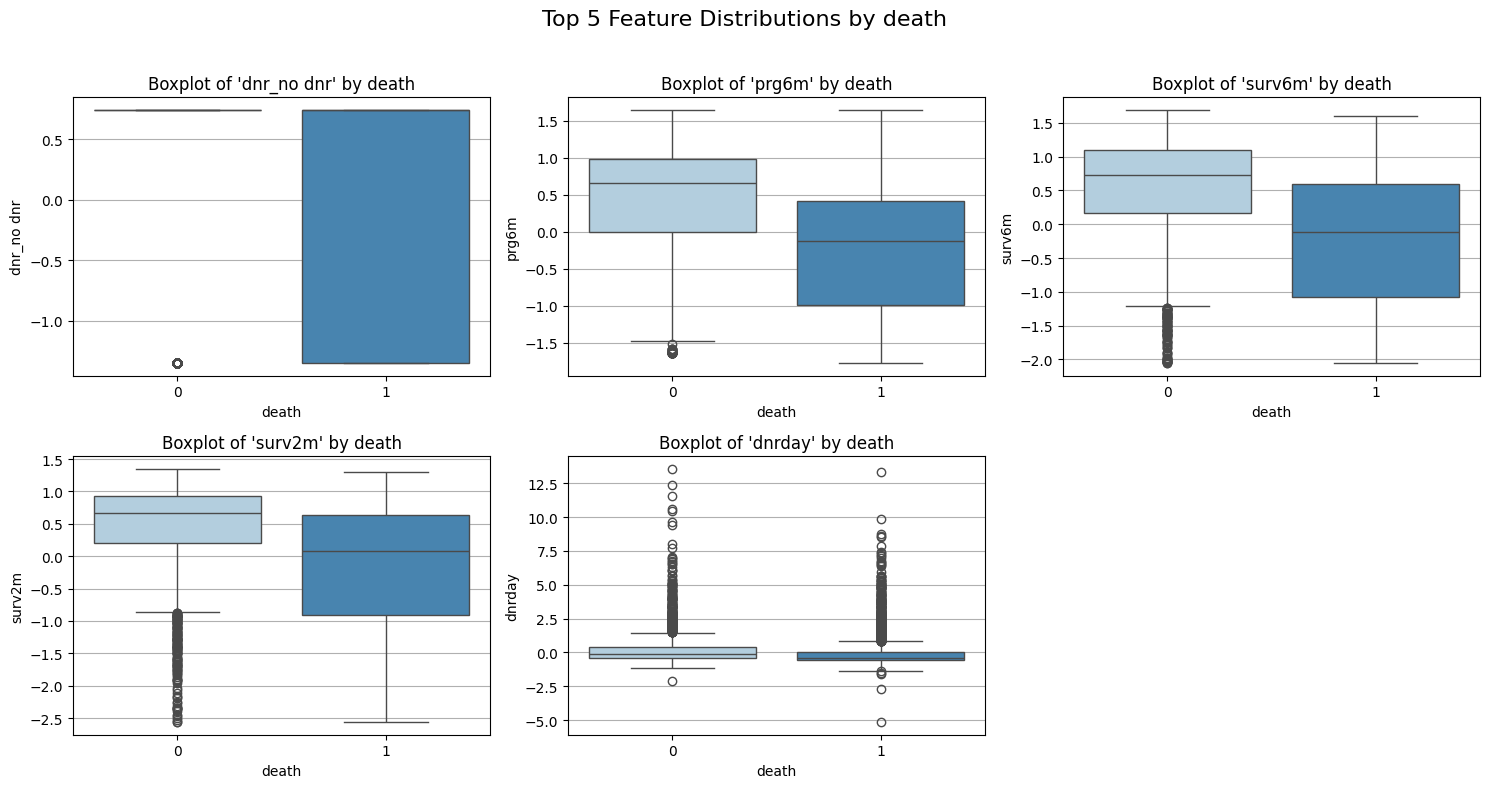

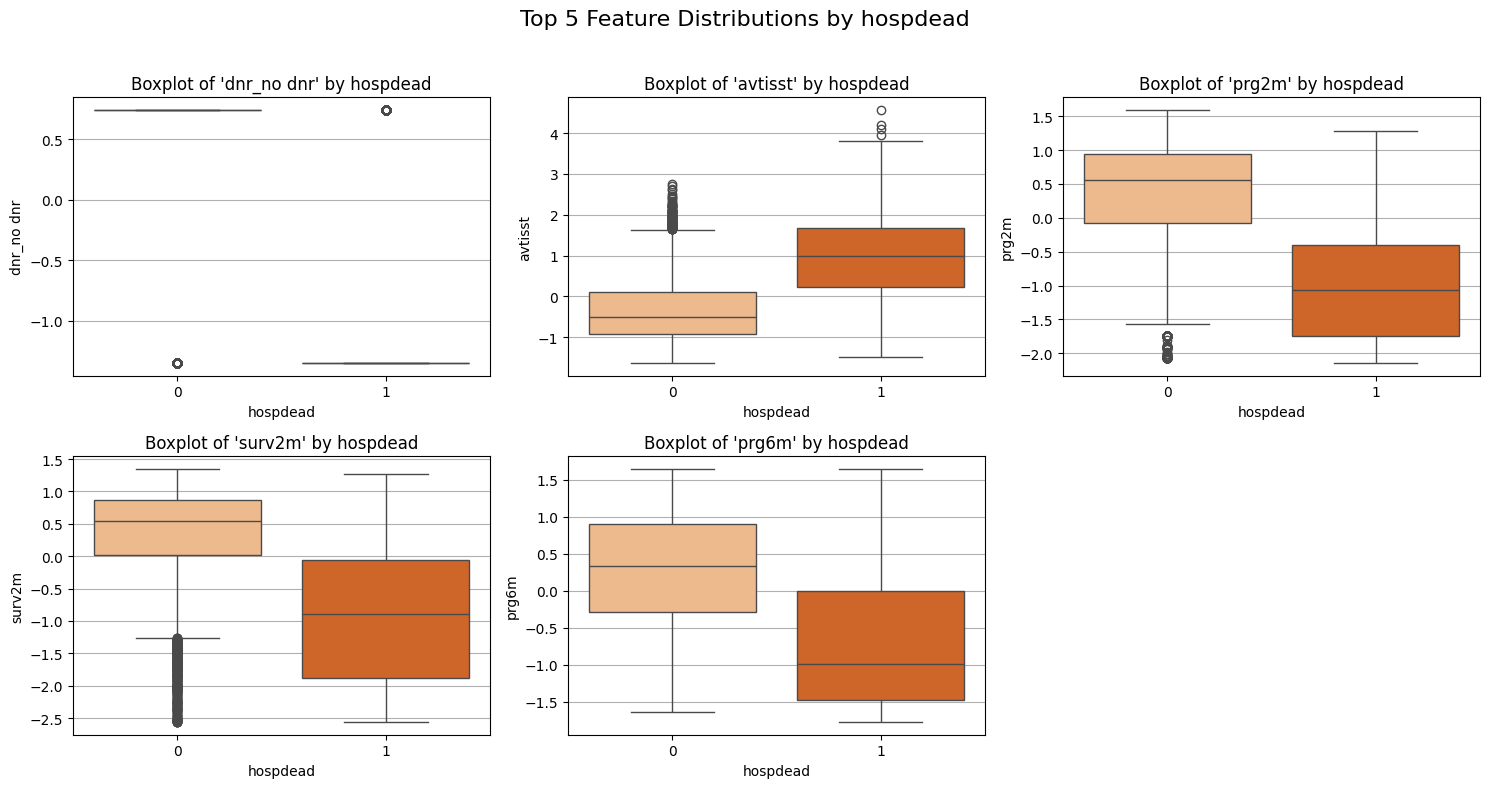

In [12]:
# ===============================================
# Step 2: Visualize Top Features by Class (Boxplots — Grid Layout)
# ===============================================
# Purpose:
# - Visualize the top 5 features individually but organized in a grid layout for each target variable.
# - Rationale: Easier to compare features while preserving individual feature plots.
# - Note: Fixed FutureWarning by using 'hue' parameter.

import matplotlib.pyplot as plt
import seaborn as sns
import math

# Define function to plot boxplots in a grid layout
def plot_top_features_grid(feature_importances, target_column, target_name, palette):
    top_features = feature_importances.head(5).index.tolist()
    n_features = len(top_features)
    cols = 3  # Adjust as needed
    rows = math.ceil(n_features / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
    axes = axes.flatten()  # Flatten in case of single row

    for i, feature in enumerate(top_features):
        sns.boxplot(
            x=target_column,
            y=df_clean[feature],
            data=df_clean,
            hue=target_column,
            ax=axes[i],
            palette=palette,
            legend=False
        )
        axes[i].set_title(f"Boxplot of '{feature}' by {target_name}")
        axes[i].set_xlabel(target_name)
        axes[i].set_ylabel(feature)
        axes[i].grid(axis='y')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"Top 5 Feature Distributions by {target_name}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the title
    plt.show()

# Plot for 'death'
plot_top_features_grid(
    feature_importances_death_weighted,
    target_column='death',
    target_name='death',
    palette='Blues'
)

# Plot for 'hospdead'
plot_top_features_grid(
    feature_importances_hospdead_weighted,
    target_column='hospdead',
    target_name='hospdead',
    palette='Oranges'
)


#### Implement SMOTE

In [13]:
# ===============================================
# Step 3: Implement SMOTE Oversampling
# ===============================================
# Purpose:
# - Address class imbalance by generating synthetic samples of the minority class.
# - Rationale: SMOTE creates new samples to improve classifier performance on imbalanced datasets.

from imblearn.over_sampling import SMOTE

# Apply SMOTE for 'death' target
smote = SMOTE(random_state=42)
X_smote_death, y_smote_death = smote.fit_resample(X, y_death)

print("After SMOTE - 'death':")
print(pd.Series(y_smote_death).value_counts())

# Apply SMOTE for 'hospdead' target
X_smote_hospdead, y_smote_hospdead = smote.fit_resample(X, y_hospdead)

print("After SMOTE - 'hospdead':")
print(pd.Series(y_smote_hospdead).value_counts())


After SMOTE - 'death':
0    6201
1    6201
Name: death, dtype: int64
After SMOTE - 'hospdead':
0    6745
1    6745
Name: hospdead, dtype: int64


#### Saving our Balanced Dataset

In [14]:
# ===============================================
# Save SMOTE-Balanced Datasets
# ===============================================
# Purpose:
# - Save the balanced datasets for 'death' and 'hospdead' targets.
# - Save in both Parquet (efficient, retains types) and CSV (easy sharing) formats.

# Step 1: Save 'death' balanced dataset
# Rationale: Ensures reproducibility and easy sharing.

# Combine features and target
X_smote_death_df = pd.DataFrame(X_smote_death, columns=X.columns)
X_smote_death_df['death'] = y_smote_death.values

# Save as Parquet
X_smote_death_df.to_parquet('../../data/Xy_smote_death.parquet')
print("Saved Xy_smote_death.parquet successfully.")

# Save as CSV
X_smote_death_df.to_csv('../../data/Xy_smote_death.csv', index=False)
print("Saved Xy_smote_death.csv successfully.")

# Step 2: Save 'hospdead' balanced dataset
# Rationale: Same as above, ensuring consistency across both targets.

# Combine features and target
X_smote_hospdead_df = pd.DataFrame(X_smote_hospdead, columns=X.columns)
X_smote_hospdead_df['hospdead'] = y_smote_hospdead.values

# Save as Parquet
X_smote_hospdead_df.to_parquet('../../data/Xy_smote_hospdead.parquet')
print("Saved Xy_smote_hospdead.parquet successfully.")

# Save as CSV
X_smote_hospdead_df.to_csv('../../data/Xy_smote_hospdead.csv', index=False)
print("Saved Xy_smote_hospdead.csv successfully.")


Saved Xy_smote_death.parquet successfully.
Saved Xy_smote_death.csv successfully.
Saved Xy_smote_hospdead.parquet successfully.
Saved Xy_smote_hospdead.csv successfully.
